# Quickstart Tutorial


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)][1]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
[![Download](images/download.png)][2][Download this Notebook][2]

[1]:https://colab.research.google.com/github/masterfulai/masterful-docs/blob/main/notebooks/tutorial_quickstart_cli.ipynb
[2]:https://docs.masterfulai.com/0.6.0/notebooks/tutorial_quickstart_cli.ipynb

## Quickstart Tutorial

In this short introduction to Masterful, you will
train and evaluate a model start to finish with the Masterful CLI Trainer.
This example will walk you through setting up your data and model and then
using them to train and evaluate a model.

## Prerequisites

Ensure you have Tensorflow installed, then install Masterful. For more details, follow the Masterful [installation instructions](../markdown/tutorial_installation.md).

In [1]:
!pip install --upgrade pip --quiet
!pip install masterful --quiet &> /dev/null

## TL;DR

Don't want to read the rest of this guide, and want to start training
immediately? The following command shows you how to start training
with Masterful, using a configuration file and dataset on S3.

The sections following this will go into more detail
on what is happening underneath the covers, and explain the dataset
and configuration file formats.

For more information on the configuration file and dataset
formats, see [Masterful Configuration File](../markdown/guide_cli_yaml_config.md) and [Masterful Dataset Format](../markdown/guide_cli_data_directory_format.md).

From Docker Install:

```shell
$ docker run -v $HOME/model_output:/root/model_output:rw --rm --gpus all masterful/masterful:latest masterful-train --config=https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/training.yaml
```

From Pip Install:

```shell
$ masterful-train --config=https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/training.yaml
```

## Setup the Dataset

The first step in any training project is to collect the data you will train with.
Masterful has a very simple, flexible CSV based format for images and labels that should
make it trivial to prepare your data for training.

A typical dataset consists of a set of images and their labels. These images
and labels are then `split` into different sets, typically called training, validation,
and test/holdout sets. The training set is used to train your model,
validation set is used to measure the performance of your model during training,
and the test/holdout set is used to measure the generalization performance of
your model on data is has never seen before. Masterful only requires a
training set. If there is no validation set, then Masterful will create one
from the training set. If there is no test/holdout set, then Masterful
will not evaluate your model on that set and will not report evaluation
metrics on the model.

Masterful uses a very simple CSV file format to describe the images and labels
in your dataset. Typically you create a separate CSV file for each
of the dataset splits (training, validation, and test) that you want
to use during training. For this tutorial, you will use a simple Flowers dataset
(the same dataset used in the [Keras Image Classification](https://www.tensorflow.org/tutorials/images/classification)
tutorial). The images and labels for this dataset are stored in the
public AWS bucket `s3://masterful-public/datasets/quickstart/`. This
bucket has the following structure:

```
quickstart/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
  training.yaml
  test.csv
  train.csv
  validation.csv
```

As you can see, there are CSV files created called `train.csv`, `test.csv`, and
`validation.csv`, which hold the description of the training, test, and validation
dataset splits respectively. You can also see a `training.yaml` file,
which is a [YAML](https://yaml.org/) formatted configuration file
which defines all of the information necessary for Masterful to train
on the above dataset. You will learn more about the configuration file
below.

For more information about the Masterful dataset format, see [Masterful Dataset Format](../markdown/guide_cli_data_directory_format.md).

## Explore the Data

There are 5 classes in the dataset listed above, corresponding
to different types of flowers. You can see examples of each
class in the plot below.

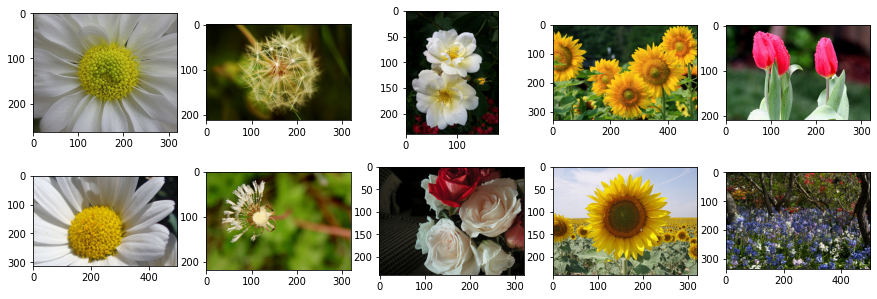

In [2]:
import matplotlib.pyplot as plt
import PIL
import requests
from io import BytesIO

daisies = [
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/daisy/100080576_f52e8ee070_n.jpg",
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/daisy/10140303196_b88d3d6cec.jpg",
]

dandelions = [
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/dandelion/10043234166_e6dd915111_n.jpg",
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/dandelion/10200780773_c6051a7d71_n.jpg",
]
roses = [
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/roses/10090824183_d02c613f10_m.jpg",
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/roses/102501987_3cdb8e5394_n.jpg",
]
sunflowers = [
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/sunflowers/1008566138_6927679c8a.jpg",
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/sunflowers/1022552002_2b93faf9e7_n.jpg",
]
tulips = [
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/tulips/100930342_92e8746431_n.jpg",
    "https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/tulips/10094729603_eeca3f2cb6.jpg",
]

images = [daisies, dandelions, roses, sunflowers, tulips]
ROWS = 2
COLUMNS = len(images)

f, axarr = plt.subplots(ROWS, COLUMNS, figsize=(15, 5))
curr_row = 0

for col, image_col in enumerate(images):
    for row, image_row in enumerate(image_col):
        with requests.get(image_row) as response:
            image = PIL.Image.open(BytesIO(response.content))
        axarr[row, col].imshow(image)

## Configure Training

Masterful uses a simple [YAML](https://yaml.org) configuration
file to setup the training parameters. The configuration
file has five major sections: dataset, model, training, evaluation, and output.
The configuration file used in this tutorial is [here](https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/training.yaml).

For more information on the configuration file format,
see [Masterful Configuration File](../markdown/guide_cli_yaml_config.md).

## Let's Get Training

Simply point Masterful to the configuration file you created,
and Masterful will begin training on your data. At the end
of training, Masterful will summarize the performance metrics
after evaluating the model on your test/holdout dataset.

In [3]:
!masterful-train --config=https://masterful-public.s3.us-west-1.amazonaws.com/datasets/quickstart/training.yaml

MASTERFUL: Your account has been successfully registered. Masterful v0.5.0 is loaded.
MASTERFUL [12:04:47]: Training with configuration 's3://masterful-public/datasets/quickstart/training.yaml'.
MASTERFUL [12:04:49]: Using model efficientnetb0_v1 with:
MASTERFUL [12:04:49]:     4055976 total parameters
MASTERFUL [12:04:49]:     4013953 trainable parameters
MASTERFUL [12:04:49]:     42023 untrainable parameters
MASTERFUL [12:04:50]: Caching I/O optimized dataset split 'train' to /home/yaoshiang/.masterful/datasets/36158d44fb4f0c63ac240db51678fac4f63ba328...
100%|███████████████████████████████████████| 2936/2936 [05:44<00:00,  8.52it/s]
MASTERFUL [12:10:42]: Caching I/O optimized dataset split 'validation' to /home/yaoshiang/.masterful/datasets/0cc422076c324bbadaf751dfa2cc5845df0f8cb4...
100%|█████████████████████████████████████████| 367/367 [00:40<00:00,  9.07it/s]
MASTERFUL [12:11:29]: Caching I/O optimized dataset split 'test' to /home/yaoshiang/.masterful/datasets/3877e18299c65143f

### Pro Tip!

If you are training on a remote machine over an SSH connection, you will
want to ensure that your training session does not die if your SSH connected
gets killed. You can use `nohup` to help here!

```
nohup masterful-train --config=s3://masterful-public/datasets/quickstart/training.yaml &> training_log.txt & while ! test -f training_log.txt; do :; done && tail -f training_log.txt
```

The above command will launch the job in the background, and then tail the output as it
comes. You can CTRL-C the output at any time, and the job will continue to you. Simply
`tail` the output file again to pick up the training log in progress.

You have now finished training your first model with the Masterful
AutoML platform!

## Next Steps

Now that you have finished this basic tutorial, we suggest exploring
the rest of the documentation for more advanced examples and use cases.
For example, you can learn how to use unlabeled data to further
improve the performance of your model. Or you can learn about other
vision tasks such as object detection and segmentation. Don't see a
topic that you are interested in? Reach out to us directly on email
at learn@masterfulai.com or join our Slack [commmunity](https://www.masterfulai.com/community).
We are happy to help walk you through whatever challenge you are facing!